In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The best found correlation coefficient is 0.735


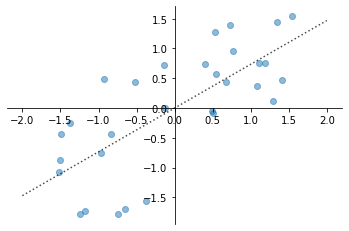

In [3]:
n_samples = 30
n_runs = 1000

X = np.random.rand(n_runs, n_samples)
X -= X.mean(axis=1, keepdims=True)
X /= X.std(axis=1, keepdims=True)

corrX = np.dot(X, X.T) / n_samples
corrX[np.eye(n_runs) == 1] = 0 # Make diagonal elements zero


i_max, j_max = np.unravel_index(np.argmax(corrX), (n_runs, n_runs))
best_rho = corrX[i_max, j_max]
print("The best found correlation coefficient is %1.3f" % best_rho)

ax = plt.subplot(111)
ax.scatter(X[i_max], X[j_max], alpha=0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot([-2, 2], [-2*best_rho, 2*best_rho], 'k:', alpha=0.7)

In [4]:
n_samples = 5
n_runs = 4

X = np.random.rand(n_runs, n_samples)
X -= X.mean(axis=1, keepdims=True)
X /= X.std(axis=1, keepdims=True)

corrX = np.dot(X, X.T) / n_samples

# X
corrX


array([[ 1.        , -0.2186862 ,  0.05318975, -0.36139946],
       [-0.2186862 ,  1.        ,  0.35659586,  0.85183333],
       [ 0.05318975,  0.35659586,  1.        ,  0.72783728],
       [-0.36139946,  0.85183333,  0.72783728,  1.        ]])

In [5]:
# Berkeley admissions---Simpson's paradox

admissions = pd.read_csv("../Data/Berkeley Admissions Data.csv")
admissions

,Dept,Male Yes,Male No,Female Yes,Female No
0,A,512,313,89,19
1,B,313,207,17,8
2,C,120,205,202,391
3,D,138,279,131,244
4,E,53,138,94,299
5,F,22,351,24,317
6,All,1158,1493,557,1278


In [7]:
fy = admissions["Female Yes"].sum()
fy = admissions["Female Yes"].sum()
my, mn, fy, fn = admissions.sum()[1:5]

m_tot = my + mn
f_tot = fy + fn

percent_female = fy / f_tot * 100
percent_male = my / m_tot * 100
print("%d%% of women were admitted to desired courses" % percent_female)
print("%d%% of men were admitted to desired courses" % percent_male)

# NB: one can calculate the p-value which turns out to be rather small

30% of women were admitted to desired courses
43% of men were admitted to desired courses


In [8]:
admissions["Males"] = admissions["Male Yes"] + admissions["Male No"]
admissions["Females"] = admissions["Female Yes"] + admissions["Female No"]
admissions["W - M"] = (admissions["Female Yes"]/admissions["Females"] - \
                       admissions["Male Yes"]/admissions["Males"])*100
admissions["Selectivity"] = (admissions["Male Yes"] + admissions["Female Yes"]) / \
                            (admissions["Males"] + admissions["Females"])
admissions["Percent W"] = (admissions["Females"] / \
                          (admissions["Females"] + admissions["Males"])) * 100
admissions

,Dept,Male Yes,Male No,Female Yes,Female No,Males,Females,W - M,Selectivity,Percent W
0,A,512,313,89,19,825,108,20.346801,0.644159,11.575563
1,B,313,207,17,8,520,25,7.807692,0.605505,4.587156
2,C,120,205,202,391,325,593,-2.858996,0.350763,64.596950
3,D,138,279,131,244,417,375,1.839808,0.339646,47.348485
4,E,53,138,94,299,191,393,-3.830116,0.251712,67.294521
5,F,22,351,24,317,373,341,1.140000,0.064426,47.759104
6,All,1158,1493,557,1278,2651,1835,-13.327406,0.382300,40.905038


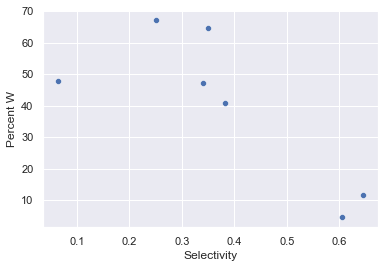

In [9]:
sns.set_theme()
sns.scatterplot(data=admissions, 
                x="Selectivity", 
                y="Percent W"
            )

TypeError: unhashable type: 'list'

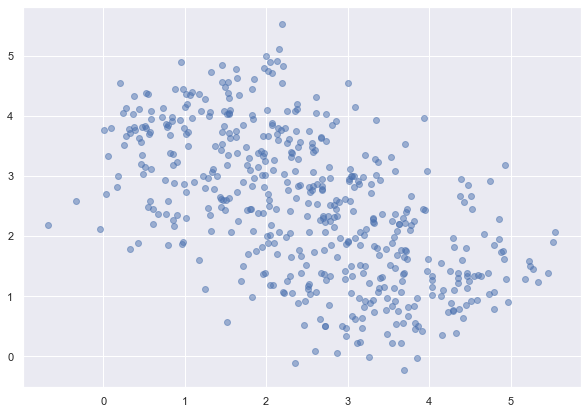

In [10]:
# Simpson's paradox

n_Z = 5
samples_per_Z = 100

C = np.array([[1, 0.6], [0.6, 0.7]]) * 0.5
root_C = np.linalg.cholesky(C)

# from (1, 4) to (4, 1)

mu_start = np.array([[1, 4]]).T
mu_end = np.array([[4, 1]]).T

mu = mu_start + (mu_end - mu_start) / (n_Z - 1) * np.arange(n_Z)
X = np.zeros((2, samples_per_Z*n_Z))
for i in range(n_Z):
    X_Z = root_C @ np.random.randn(2, samples_per_Z) + mu[:, i, None]
    X[:, i*samples_per_Z:(i+1)*samples_per_Z] = X_Z
    
ax = plt.subplot(111)
plt.gcf().set_size_inches(10, 7)
ax.scatter(X[0, :], X[1, :], alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title("$\\rho(X, Y)=$%1.3f" % np.corrcoef(X)[0, 1])

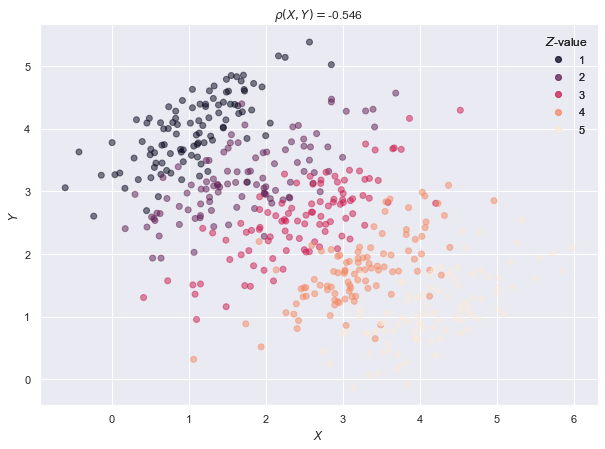

In [25]:
ax = plt.subplot(111)
plt.gcf().set_size_inches(10, 7)
Z = 1 + np.floor(np.arange(n_Z*samples_per_Z) / samples_per_Z)
scatter = ax.scatter(X[0, :], X[1, :], alpha=0.5, c=Z)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_title("$\\rho(X, Y)=$%1.3f" % np.corrcoef(X)[0, 1])
legend = ax.legend(*scatter.legend_elements(),
                   loc="upper right", 
                   title="$Z$-value",
                   frameon=False
                  )

ax.add_artist(legend)

In [11]:
aa = admissions[["Dept", "Male Yes", "Male No", "Female Yes", "Female No"]]
aa = aa[:-1].melt(id_vars="Dept")
sexes = ["Male", "Female"]

def fun(row):
    if "Male" in row["variable"]:
        return "Male"
    else:
        return "Female"

aa["sex"] = aa.apply(fun, axis=1)
aa["admitted"] = aa["variable"].str.contains("Yes")
aa = aa[["Dept", "value", "sex", "admitted"]]
aa.head()

,Dept,value,sex,admitted
0,A,512,Male,True
1,B,313,Male,True
2,C,120,Male,True
3,D,138,Male,True
4,E,53,Male,True


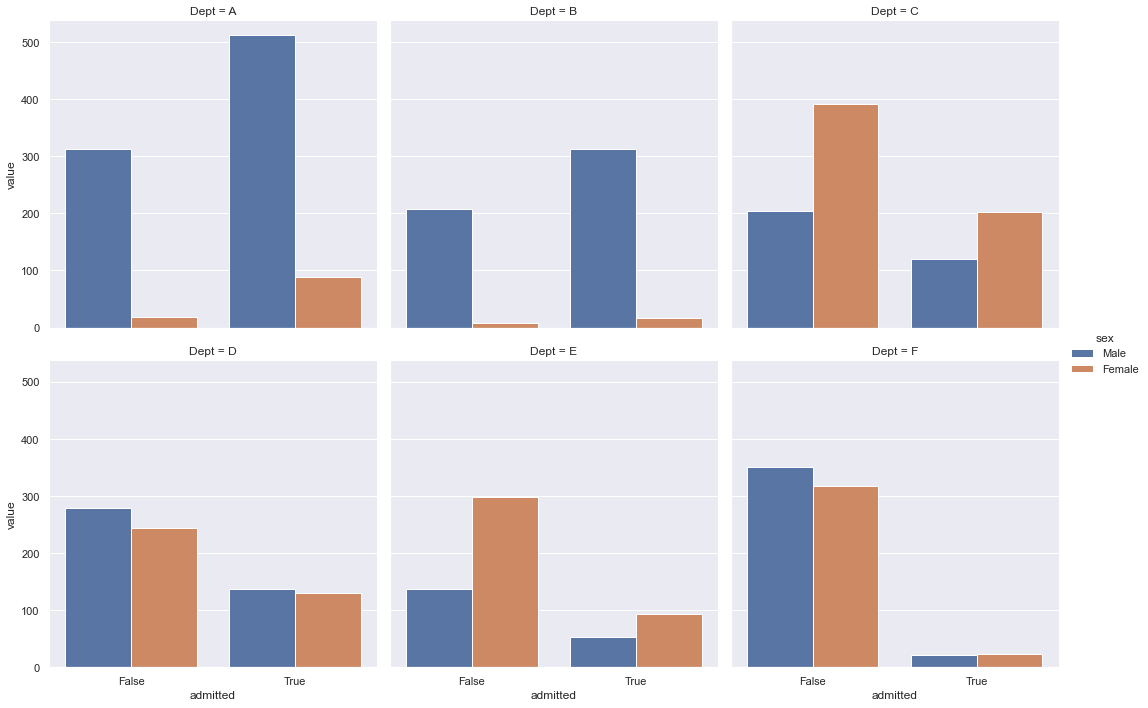

In [19]:
sns.catplot(data=aa, 
            x="admitted", 
            y="value", 
            hue="sex", 
            col="Dept", 
            col_wrap=3, 
            kind="bar"
           )

In [12]:
admissions["FP"] = admissions["Female Yes"] / admissions["Females"]
admissions["MP"] = admissions["Male Yes"] / admissions["Males"]
admissions

,Dept,Male Yes,Male No,Female Yes,Female No,Males,Females,W - M,Selectivity,Percent W,FP,MP
0,A,512,313,89,19,825,108,20.346801,0.644159,11.575563,0.824074,0.620606
1,B,313,207,17,8,520,25,7.807692,0.605505,4.587156,0.680000,0.601923
2,C,120,205,202,391,325,593,-2.858996,0.350763,64.596950,0.340641,0.369231
3,D,138,279,131,244,417,375,1.839808,0.339646,47.348485,0.349333,0.330935
4,E,53,138,94,299,191,393,-3.830116,0.251712,67.294521,0.239186,0.277487
5,F,22,351,24,317,373,341,1.140000,0.064426,47.759104,0.070381,0.058981
6,All,1158,1493,557,1278,2651,1835,-13.327406,0.382300,40.905038,0.303542,0.436816


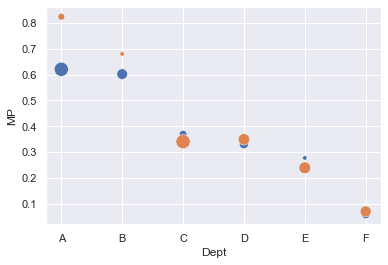

In [13]:
sns.scatterplot(data=admissions[:-1], x="Dept", y="MP", size="Males", sizes=(20, 200), legend=False)
sns.scatterplot(data=admissions[:-1], x="Dept", y="FP", size="Females", sizes=(20, 200), legend=False)

In [14]:
n_Z = 5
samples_per_Z = 100

C = np.array([[1, 0.6], [0.6, 0.7]]) * 0.5
root_C = np.linalg.cholesky(C)

# from (1, 4) to (4, 1)

mu_start = np.array([[1, 4]]).T
mu_end = np.array([[4, 1]]).T

mu = mu_start + (mu_end - mu_start) / (n_Z - 1) * np.arange(n_Z)

mu

array([[1.  , 1.75, 2.5 , 3.25, 4.  ],
       [4.  , 3.25, 2.5 , 1.75, 1.  ]])